In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-gas-usage/data.csv


In [2]:
df = pd.read_csv('/kaggle/input/natural-gas-usage/data.csv')
df.head() 

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


## Annual consumption of natural gas in the US in millions of cubic feet (MMCF)

In [3]:
annual_value = df.groupby('year')['value'].sum()
annual_value

year
2014     99736609.0
2015    102211748.0
2016    103080712.0
2017    101646612.0
2018    112843425.0
2019    116005043.0
2020    113767103.0
2021    113636162.0
2022    119863974.0
2023    118797360.0
2024     13005655.0
Name: value, dtype: float64

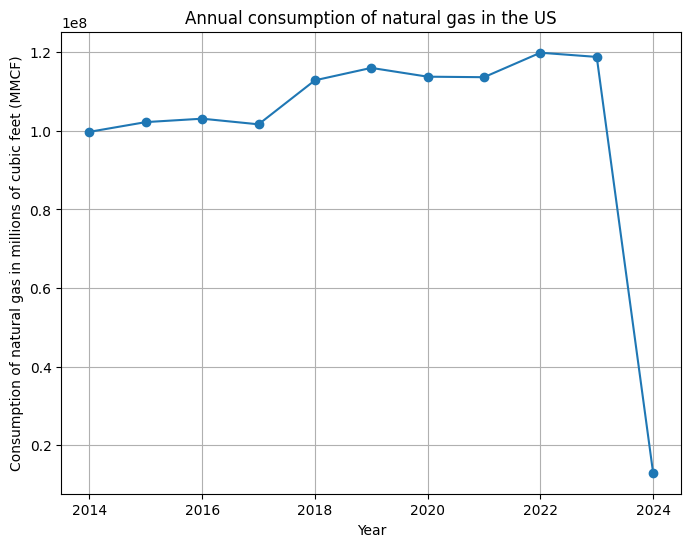

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(annual_value, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Consumption of natural gas in millions of cubic feet (MMCF)')
plt.title('Annual consumption of natural gas in the US')
plt.grid(True)
plt.show()

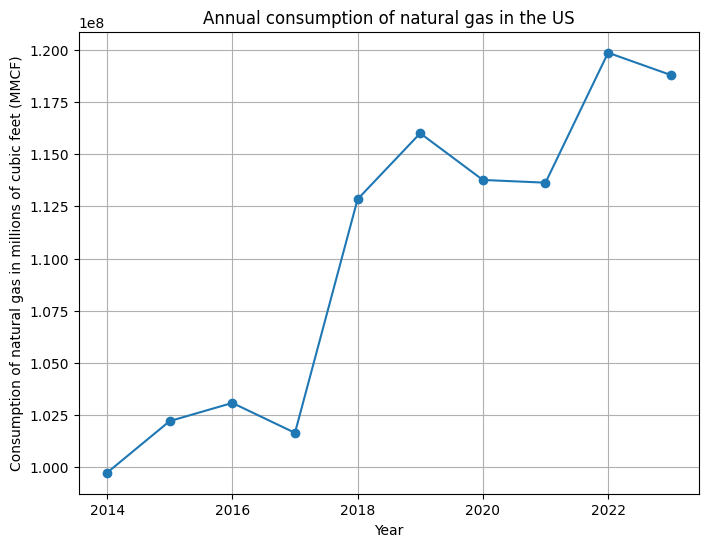

In [5]:
annual_value_without_2024 = annual_value.loc[:2023] 
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(annual_value_without_2024, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Consumption of natural gas in millions of cubic feet (MMCF)')
plt.title('Annual consumption of natural gas in the US')
plt.grid(True)
plt.show()

## Seasonal consumption of natural gas in the US

In [6]:
# Assuming df is your DataFrame
# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create a new column for seasons
df['season'] = df['month'].apply(get_season)

# Group by year and season, then sum the values
seasonal_values = df.groupby(['year', 'season'])['value'].sum().reset_index()

print(seasonal_values)

    year  season       value
0   2014    Fall  22682242.0
1   2014  Spring  23694556.0
2   2014  Summer  20649115.0
3   2014  Winter  32710696.0
4   2015    Fall  22914905.0
5   2015  Spring  24152092.0
6   2015  Summer  22443915.0
7   2015  Winter  32700836.0
8   2016    Fall  22542201.0
9   2016  Spring  23967506.0
10  2016  Summer  23943817.0
11  2016  Winter  32627188.0
12  2017    Fall  23506635.0
13  2017  Spring  23712357.0
14  2017  Summer  22903828.0
15  2017  Winter  31523792.0
16  2018    Fall  26680005.0
17  2018  Spring  26942067.0
18  2018  Summer  25048603.0
19  2018  Winter  34172750.0
20  2019    Fall  27067753.0
21  2019  Spring  27037885.0
22  2019  Summer  25735928.0
23  2019  Winter  36163477.0
24  2020    Fall  25664685.0
25  2020  Spring  26180240.0
26  2020  Summer  25984033.0
27  2020  Winter  35938145.0
28  2021    Fall  26130637.0
29  2021  Spring  25947954.0
30  2021  Summer  26203084.0
31  2021  Winter  35354487.0
32  2022    Fall  27398662.0
33  2022  Spri

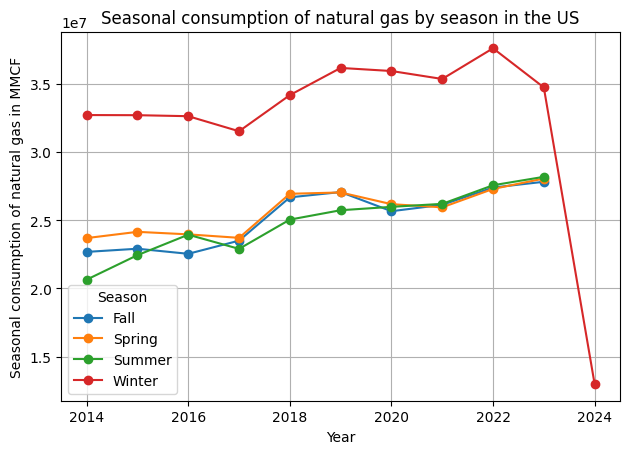

In [7]:
# Assuming seasonal_values is your DataFrame with seasonal values
# Pivot the DataFrame to have seasons as columns
seasonal_values_pivot = seasonal_values.pivot(index='year', columns='season', values='value')

# Plot the values against the year for each season
seasonal_values_pivot.plot(marker='o', linestyle='-')

# Add labels and title
plt.title('Seasonal consumption of natural gas by season in the US')
plt.xlabel('Year')
plt.ylabel('Seasonal consumption of natural gas in MMCF')
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

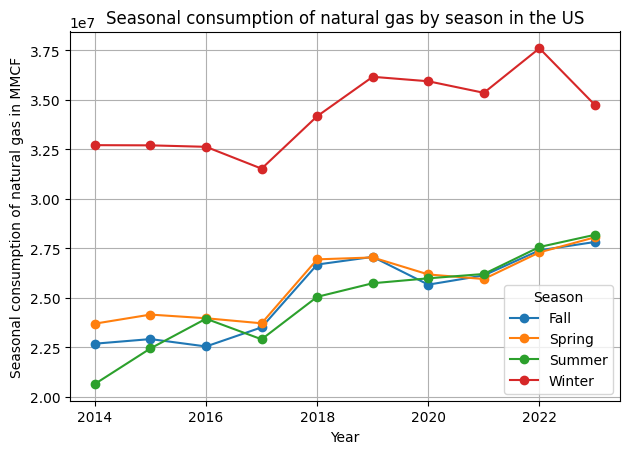

In [8]:
seasonal_values_ex2024 = seasonal_values[:40]
seasonal_values_ex2024_pivot = seasonal_values_ex2024.pivot(index='year', columns='season', values='value')

# Plot the values against the year for each season
seasonal_values_ex2024_pivot.plot(marker='o', linestyle='-')

# Add labels and title
plt.title('Seasonal consumption of natural gas by season in the US')
plt.xlabel('Year')
plt.ylabel('Seasonal consumption of natural gas in MMCF')
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

## Consumption by use

In [9]:
df['process-name'].unique()

array(['Commercial Consumption', 'Vehicle Fuel Consumption',
       'Electric Power Consumption', 'Delivered to Consumers',
       'Industrial Consumption', 'Residential Consumption',
       'Pipeline Fuel Consumption', 'Lease and Plant Fuel Consumption'],
      dtype=object)

In [10]:
consumption_by_use = df.groupby('process-name')['value'].sum()
consumption_by_use

process-name
Commercial Consumption               67513144.0
Delivered to Consumers              543148364.0
Electric Power Consumption          215847239.0
Industrial Consumption              163990399.0
Lease and Plant Fuel Consumption     17433791.0
Pipeline Fuel Consumption             9402492.0
Residential Consumption              96269430.0
Vehicle Fuel Consumption               989544.0
Name: value, dtype: float64

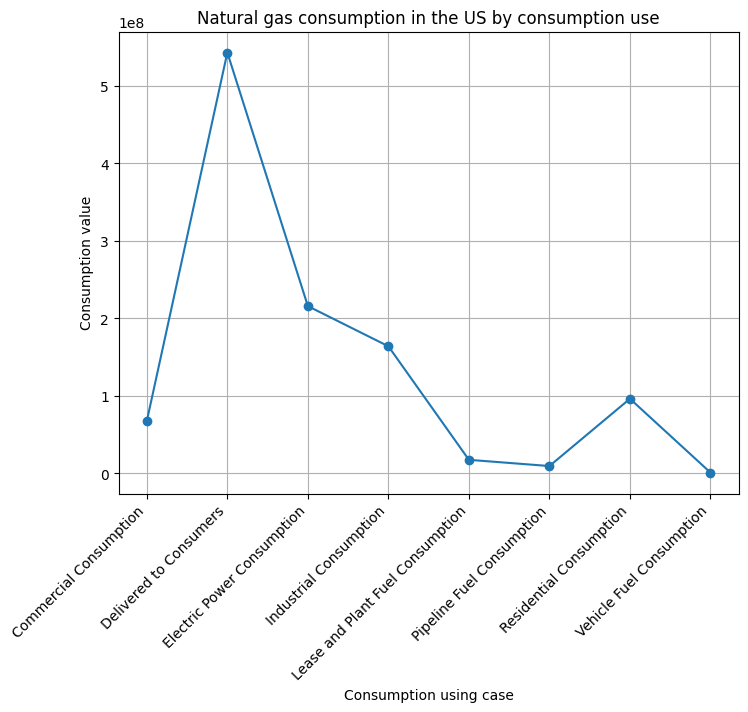

In [11]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(consumption_by_use, marker = 'o')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Consumption using case')
plt.ylabel('Consumption value')
plt.title('Natural gas consumption in the US by consumption use')
plt.grid(True)
plt.show()

## Consumption cases by year and season

In [12]:
seasonal_cases = df.groupby(['year', 'season', 'process-name'])['value'].sum().reset_index()
seasonal_cases

,year,season,process-name,value
0,2014,Fall,Commercial Consumption,1425605.0
1,2014,Fall,Delivered to Consumers,11068416.0
2,2014,Fall,Electric Power Consumption,4149456.0
3,2014,Fall,Industrial Consumption,3721062.0
4,2014,Fall,Lease and Plant Fuel Consumption,386487.0
...,...,...,...,...
323,2024,Winter,Industrial Consumption,1561164.0
324,2024,Winter,Lease and Plant Fuel Consumption,165729.0
325,2024,Winter,Pipeline Fuel Consumption,138786.0
326,2024,Winter,Residential Consumption,1673886.0


In [13]:
seasonal_cases_pivot = seasonal_cases.pivot(index=['year', 'season'], columns='process-name', values='value')
seasonal_cases_pivot.index.shape

(41,)

<Figure size 1400x800 with 0 Axes>

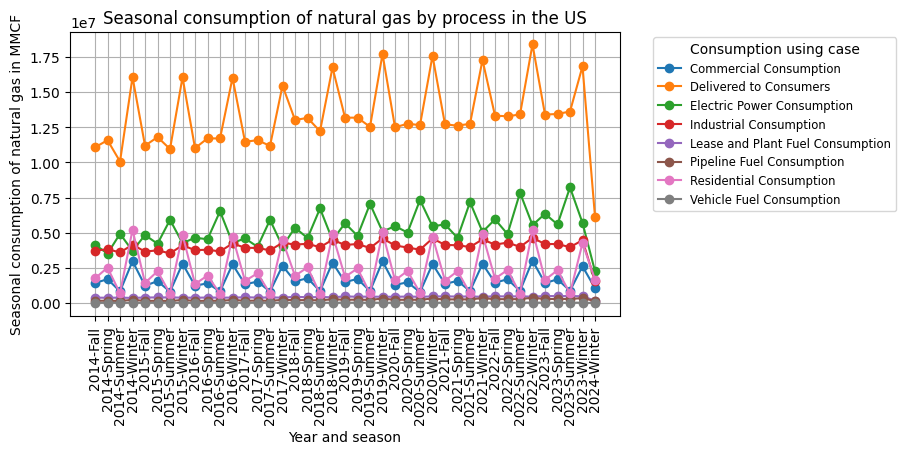

In [14]:
# Assuming seasonal_cases_pivot is your DataFrame
# Combine 'year' and 'season' into a single string for x-axis labels
x_labels = [f"{year}-{season}" for year, season in seasonal_cases_pivot.index]

# Plot the values against the year for each season
plt.figure(figsize=(14, 8))  # Set the figsize
seasonal_cases_pivot.plot(marker='o', linestyle='-')

# Add labels and title
plt.title('Seasonal consumption of natural gas by process in the US')
plt.xlabel('Year and season')
plt.ylabel('Seasonal consumption of natural gas in MMCF')

# Show all x-ticks labels
plt.xticks(range(len(x_labels)), x_labels, rotation=90, ha='center')

# Ensure all x-tick labels are shown without overlap
plt.tight_layout()

# Minimize the legend size
plt.legend(title='Consumption using case', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.grid(True)
plt.show()


## Annual consumption by process

In [15]:
annual_consumption = df.groupby(['year', 'process-name'])['value'].sum().reset_index()
pivot_df = annual_consumption.pivot(index='year', columns='process-name', values='value')
pivot_df

process-name,Commercial Consumption,Delivered to Consumers,Electric Power Consumption,Industrial Consumption,Lease and Plant Fuel Consumption,Pipeline Fuel Consumption,Residential Consumption,Vehicle Fuel Consumption
year,,,,,,,,
2014,6932612.0,48762164.0,16291966.0,15292081.0,1512143.0,700151.0,10174927.0,70565.0
2015,6403469.0,49978573.0,19226742.0,15043809.0,1576389.0,678183.0,9225776.0,78807.0
2016,6219168.0,50424318.0,19970546.0,15457379.0,1545330.0,686731.0,8693193.0,84047.0
2017,6329218.0,49669433.0,18531115.0,15886029.0,1585903.0,721865.0,8826646.0,96403.0
2018,7027907.0,55136320.0,21177881.0,16834597.0,1694238.0,876534.0,9995106.0,100842.0
2019,7029122.0,56582007.0,22576207.0,16833317.0,1822939.0,1018093.0,10037030.0,106328.0
2020,6325322.0,55461924.0,23263441.0,16425949.0,1825380.0,1017904.0,9348920.0,98263.0
2021,6578147.0,55326978.0,22457176.0,16749357.0,1850742.0,1131473.0,9433312.0,108977.0
2022,7018151.0,58386181.0,24232450.0,17073745.0,1882803.0,1212337.0,9928323.0,129984.0


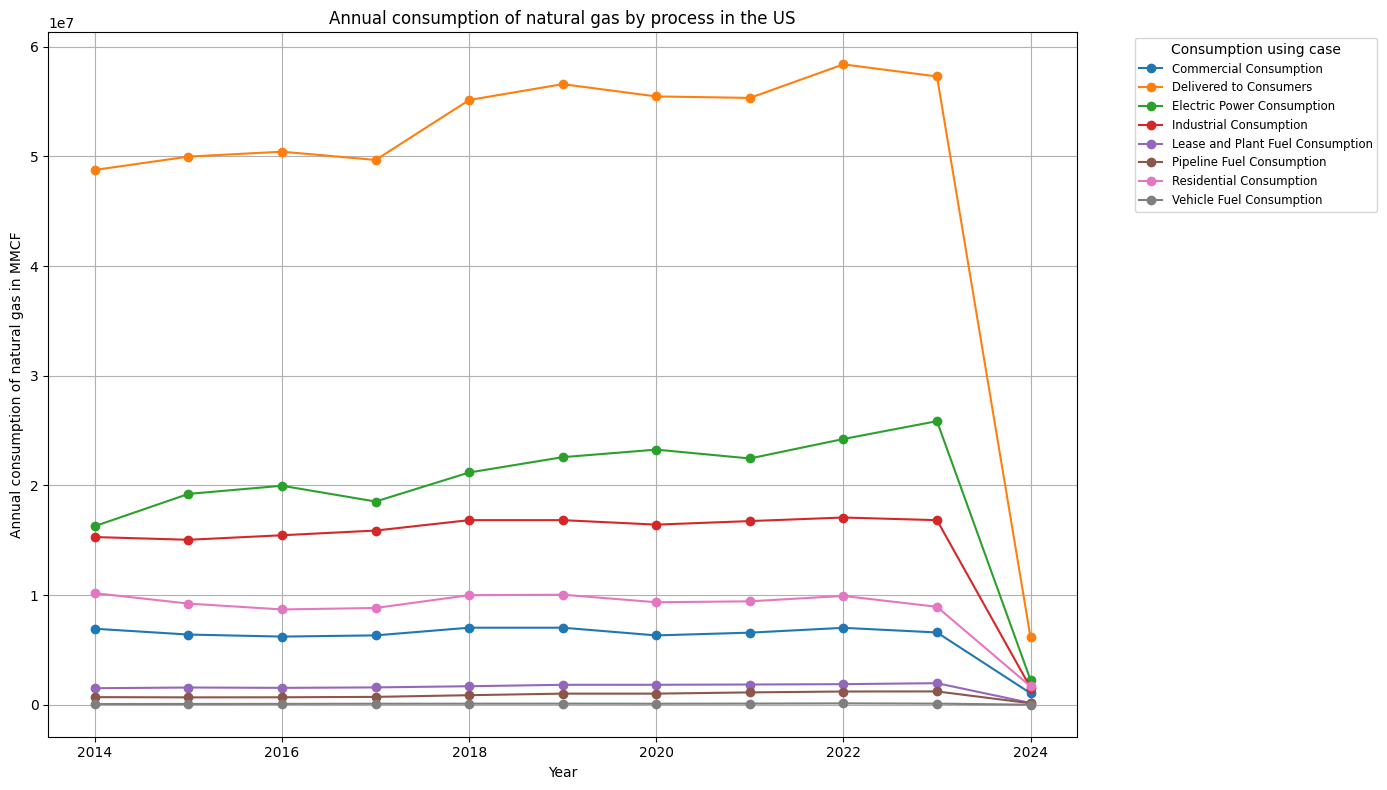

In [16]:
# Calculate annual consumption
annual_consumption = df.groupby(['year', 'process-name'])['value'].sum().reset_index()

# Pivot the dataframe
pivot_df = annual_consumption.pivot(index='year', columns='process-name', values='value')

# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))  # Set the figsize

# Plot lines with markers for better visualization
pivot_df.plot(marker='o', linestyle='-', ax=ax)

# Set labels and title
ax.set_title('Annual consumption of natural gas by process in the US')
ax.set_xlabel('Year')
ax.set_ylabel('Annual consumption of natural gas in MMCF')

# Minimize the legend size
ax.legend(title='Consumption using case', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Add grid
ax.grid(True)

# Ensure everything fits in the plot
fig.tight_layout()

plt.show()


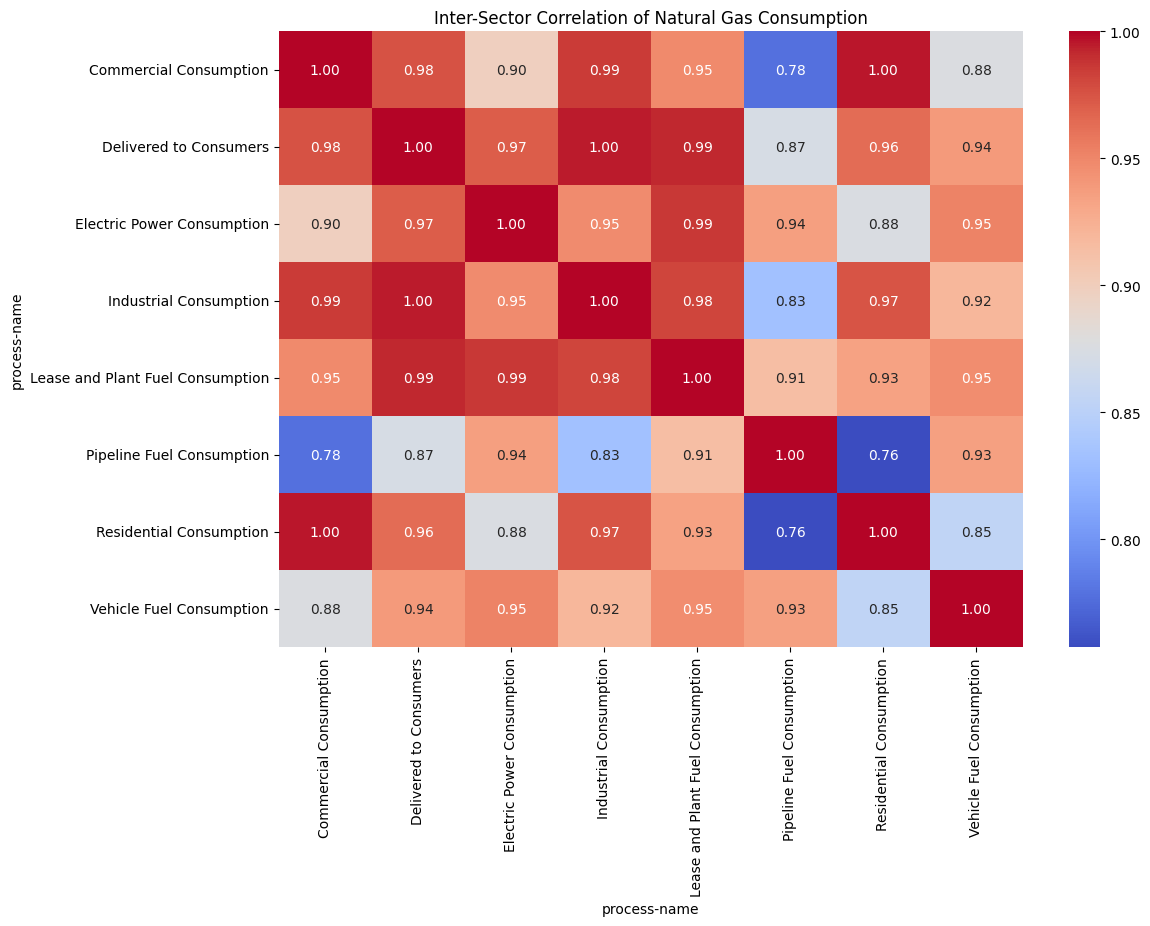

In [17]:
correlation_matrix = pivot_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Inter-Sector Correlation of Natural Gas Consumption')
plt.xticks(rotation=90, ha = 'center')
plt.show()

## Monthly consumption

In [18]:
month_value = df.groupby('month')['value'].sum()
month_value

month
1     136081574.0
2     107472119.0
3     100555073.0
4      80966120.0
5      75465699.0
6      76900961.0
7      85943802.0
8      85816735.0
9      77215864.0
10     80686022.0
11     94505896.0
12    112984538.0
Name: value, dtype: float64

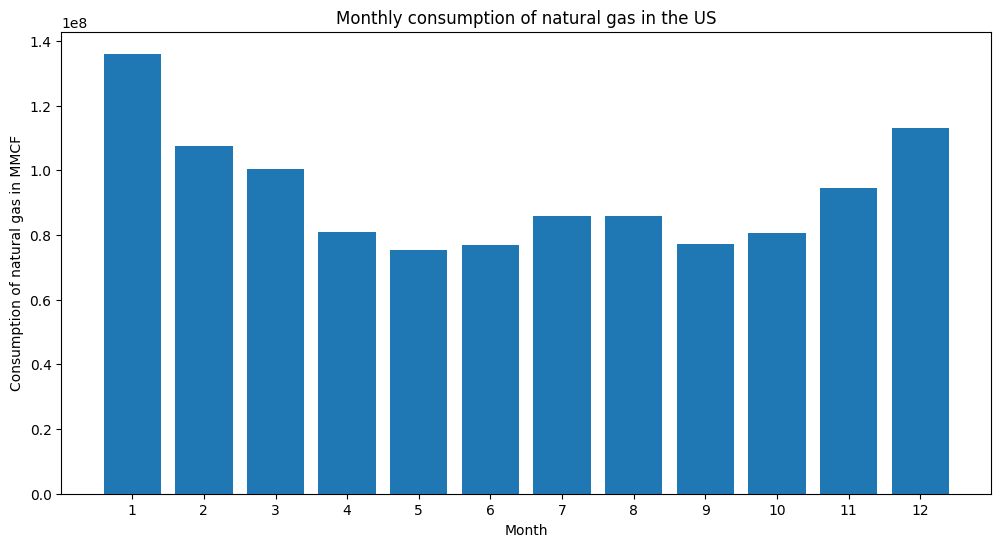

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.8  

x_indices = np.arange(len(month_value.index))

ax.bar(x_indices, month_value.values, width=bar_width)

ax.set_title('Monthly consumption of natural gas in the US')
ax.set_xlabel('Month')
ax.set_ylabel('Consumption of natural gas in MMCF')
ax.set_xticks(x_indices)  # Set the ticks at the center of each bar
ax.set_xticklabels(month_value.index)

plt.show()

## Geographical distribution

In [20]:
df['area-name'].unique()

array(['FLORIDA', 'USA-NH', 'USA-OR', 'USA-DE', 'USA-AZ', 'USA-WV',
       'USA-HI', 'USA-NM', 'USA-MI', 'USA-MT', 'USA-VT', 'USA-ME',
       'USA-IN', 'USA-MS', 'USA-NE', 'USA-DC', 'USA-AR', 'USA-NC',
       'USA-OK', 'USA-CT', 'USA-WI', 'USA-RI', 'USA-NJ', 'USA-MD',
       'USA-MO', 'WASHINGTON', 'USA-LA', 'USA-ID', 'USA-KY', 'USA-TN',
       'MINNESOTA', 'USA-UT', 'USA-IL', 'USA-AL', 'USA-PA',
       'MASSACHUSETTS', 'OHIO', 'USA-AK', 'USA-SC', 'U.S.', 'USA-WY',
       'TEXAS', 'USA-ND', 'USA-VA', 'USA-IA', 'CALIFORNIA', 'USA-NV',
       'USA-GA', 'NEW YORK', 'USA-SD', 'USA-KS', 'COLORADO'], dtype=object)

In [21]:
df['area-name'].unique().shape

(52,)

In [22]:
df.groupby('area-name')['value'].sum()

area-name
CALIFORNIA        41939853.0
COLORADO           7957620.0
FLORIDA           29296564.0
MASSACHUSETTS      8291092.0
MINNESOTA          9467556.0
NEW YORK          25978857.0
OHIO              21779429.0
TEXAS             77615070.0
U.S.             571970195.0
USA-AK             1629798.0
USA-AL            13561471.0
USA-AR             6551880.0
USA-AZ             8013445.0
USA-CT             5380675.0
USA-DC              578410.0
USA-DE             1860598.0
USA-GA            14682572.0
USA-HI               59968.0
USA-IA             7740204.0
USA-ID             2310231.0
USA-IL            21199284.0
USA-IN            16096187.0
USA-KS             5204588.0
USA-KY             5980411.0
USA-LA            30000997.0
USA-MD             4949264.0
USA-ME              996505.0
USA-MI            18480161.0
USA-MO             5831303.0
USA-MS            10624924.0
USA-MT             1536753.0
USA-NC            11364969.0
USA-ND             1486499.0
USA-NE             3363299.0
USA-